In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.width', None)  # None = usa la larghezza completa del terminale
pd.set_option('display.max_columns', None)

# Carica dataset
df = pd.read_csv("../data/raw/deam_emotion_tags.csv")

# Mostra dimensioni
print("Dimensioni dataset:", df.shape)

# Mostra colonne
print("Colonne dataset:", df.columns.tolist())

# Tipi di dato
print("\nTipi di dato:")
display(df.dtypes)

# Controllo dei valori nulli
print("\nSomma di elementi nulli: ") 
display(df.isnull().sum())

# Anteprima
print("\nAnteprima dataset: ")
display(df.head())


Dimensioni dataset: (1802, 5)
Colonne dataset: ['Track_ID', 'Title', 'Valence', 'Arousal', 'Emotion_Label']

Tipi di dato:


Track_ID          object
Title             object
Valence          float64
Arousal          float64
Emotion_Label     object
dtype: object


Somma di elementi nulli: 


Track_ID         0
Title            0
Valence          0
Arousal          0
Emotion_Label    0
dtype: int64


Anteprima dataset: 


,Track_ID,Title,Valence,Arousal,Emotion_Label
0,T0001,Song_1,0.37,0.35,Sad
1,T0002,Song_2,0.95,0.30,Relaxed
2,T0003,Song_3,0.73,0.35,Relaxed
3,T0004,Song_4,0.60,0.77,Happy
4,T0005,Song_5,0.16,0.66,Angry


Conteggio delle emozioni: 
Emotion_Label
Happy      485
Sad        448
Relaxed    437
Angry      432
Name: count, dtype: int64

Percentuali:
Emotion_Label
Happy      26.91
Sad        24.86
Relaxed    24.25
Angry      23.97
Name: proportion, dtype: float64


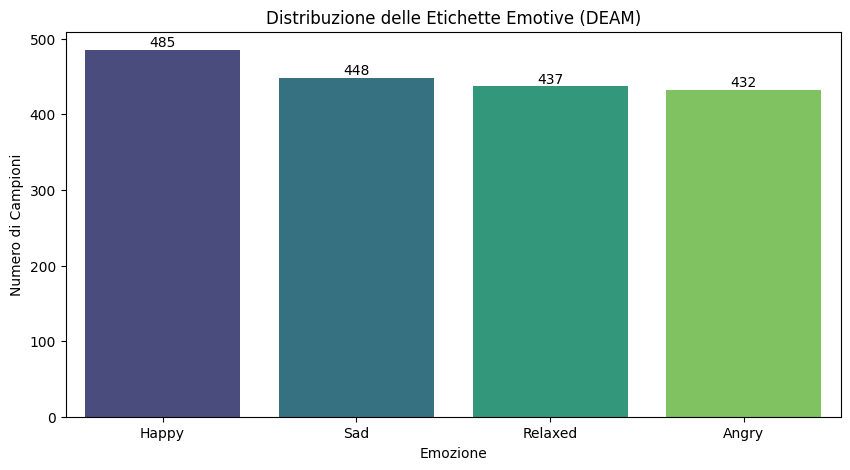

In [2]:
# 1. Conteggio delle emozioni
emotion_counts = df['Emotion_Label'].value_counts()
print("Conteggio delle emozioni: ")
print(emotion_counts)

# 2. Calcola le percentuali
emotion_percentages = (df['Emotion_Label'].value_counts(normalize=True) * 100).round(2)
print("\nPercentuali:")
print(emotion_percentages)

# 3. Crea un bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, hue=emotion_counts.index, palette='viridis', legend=False)
plt.title('Distribuzione delle Etichette Emotive (DEAM)')
plt.xlabel('Emozione')
plt.ylabel('Numero di Campioni')
# Aggiungi le etichette con i valori sopra ogni barra
for i, count in enumerate(emotion_counts.values):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')
plt.show()

### Analisi della Distribuzione delle Emozioni

Il grafico a barre mostra la distribuzione delle quattro emozioni nel dataset. Possiamo osservare che:

*   **Happy** è l'emozione più rappresentata (485 campioni, 26.91%).
*   **Sad** (448 campioni, 24.86%), **Relaxed** (437 campioni, 24.25%) e **Angry** (432 campioni, 23.97%) hanno una rappresentazione molto simile.

**Conclusione:** Il dataset è **quasi perfettamente bilanciato**. Questo è un risultato eccellente perché significa che il nostro modello di machine learning non sarà influenzato da una classe dominante e potrà imparare a riconoscere tutte le emozioni in modo equo.

           Valence      Arousal
count  1802.000000  1802.000000
mean      0.498036     0.499867
std       0.293361     0.287195
min       0.000000     0.000000
25%       0.240000     0.260000
50%       0.505000     0.505000
75%       0.750000     0.750000
max       1.000000     1.000000


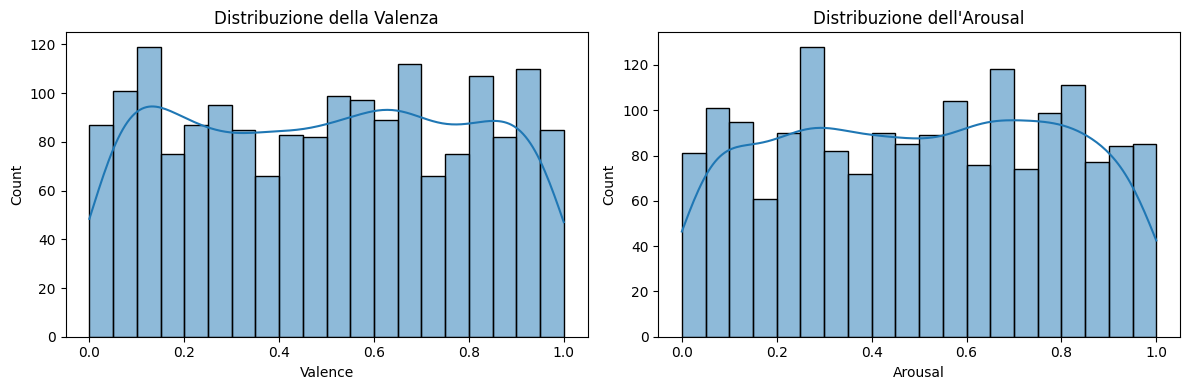

In [10]:
# Statistiche descrittive per Valenza e Arousal
print(df[['Valence', 'Arousal']].describe())

# Istogrammi per Valenza e Arousal
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['Valence'], bins=20, kde=True, ax=ax[0])
ax[0].set_title('Distribuzione della Valenza')
sns.histplot(df['Arousal'], bins=20, kde=True, ax=ax[1])
ax[1].set_title('Distribuzione dell\'Arousal')
plt.tight_layout()
plt.show()

### Analisi di Valenza e Arousal: Statistiche Descrittive

La tabella delle statistiche descrittive ci fornisce informazioni numeriche preziose:

*   **Media (mean):** Sia la Valenza che l'Arousal hanno una media di circa 0.5. Questo ci dice che il centro della distribuzione dei valori è proprio a metà dello spettro possibile (che va da 0 a 1).
*   **Deviazione Standard (std):** I valori sono circa 0.29, il che indica che i dati sono abbastanza dispersi attorno alla media e non sono troppo "concentrati". Questo è un bene, significa che abbiamo esempi per tutti i livelli di Valenza e Arousal.
*   **Mediana (50%):** Anche la mediana è 0.505, confermando che la distribuzione è molto simmetrica e bilanciata attorno al valore centrale.
*   **Minimo e Massimo (min, max):** I valori coprono l'intero range possibile da 0 a 1. Abbiamo quindi esempi di brani estremamente spiacevoli e molto eccitanti, così come brani molto calmi e molto piacevoli.

Gli istogrammi confermano visivamente queste osservazioni: entrambe le distribuzioni sono approssimativamente uniformi, il che significa che ogni valore tra 0 e 1 è rappresentato più o meno allo stesso modo. Non ci sono "buchi" nella nostra raccolta dati.

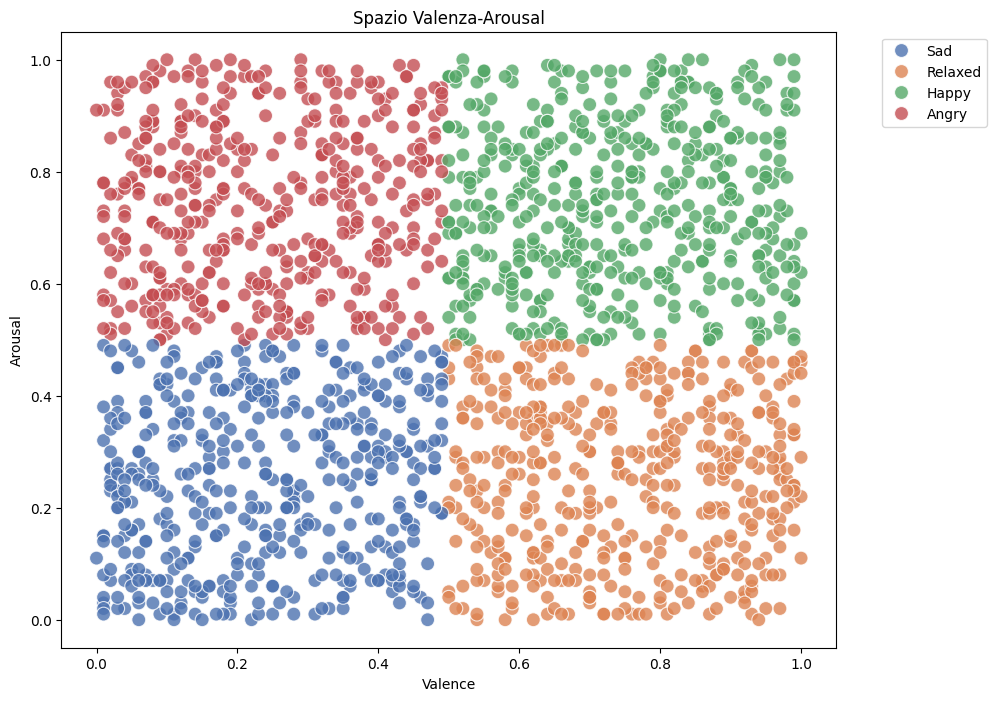

In [8]:
# Scatter plot Valenza vs Arousal, colorato per etichetta
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(data=df, x='Valence', y='Arousal', hue='Emotion_Label', palette='deep', s=100, alpha=0.8)
plt.title('Spazio Valenza-Arousal')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Sposta la legenda fuori dal grafico
plt.show()

### Analisi dello Spazio Valenza-Arousal

Questo grafico è fondamentale perché visualizza la teoria psicologica alla base del dataset. Ogni punto è un brano, posizionato in base al suo valore di Valenza (asse X) e Arousal (asse Y), e colorato in base all'emozione che gli è stata assegnata.

Osservando il grafico, si possono chiaramente distinguere quattro quadranti, esattamente come previsto dalla teoria:

1.  **Alta Valenza, Alto Arousal (in alto a destra):** Questo quadrante è dominato dal colore **arancione (Happy)**. I brani felici sono infatti quelli piacevoli (alta valenza) ed eccitanti (alto arousal).
2.  **Bassa Valenza, Alto Arousal (in alto a sinistra):** Questo quadrante è dominato dal colore **rosso (Angry)**. I brani arrabbiati o che trasmettono tensione sono spiacevoli (bassa valenza) ma molto energici ed eccitanti (alto arousal).
3.  **Bassa Valenza, Basso Arousal (in basso a sinistra):** Questo quadrante è dominato dal colore **blu (Sad)**. I brani tristi sono spiacevoli (bassa valenza) e calmi/depressivi (basso arousal).
4.  **Alta Valenza, Basso Arousal (in basso a destra):** Questo quadrante è dominato dal colore **verde (Relaxed)**. I brani rilassati sono piacevoli (alta valenza) ma calmi e pacati (basso arousal).

**Conclusione:** La separazione non è perfetta (c'è una certa sovrapposizione, specialmente al centro), ma è **estremamente chiara e coerente con la teoria**. Questo è un forte indicatore che le features audio che andremo ad analizzare troveranno pattern ben distinti per classificare le emozioni. È un risultato molto promettente per la riuscita del progetto.

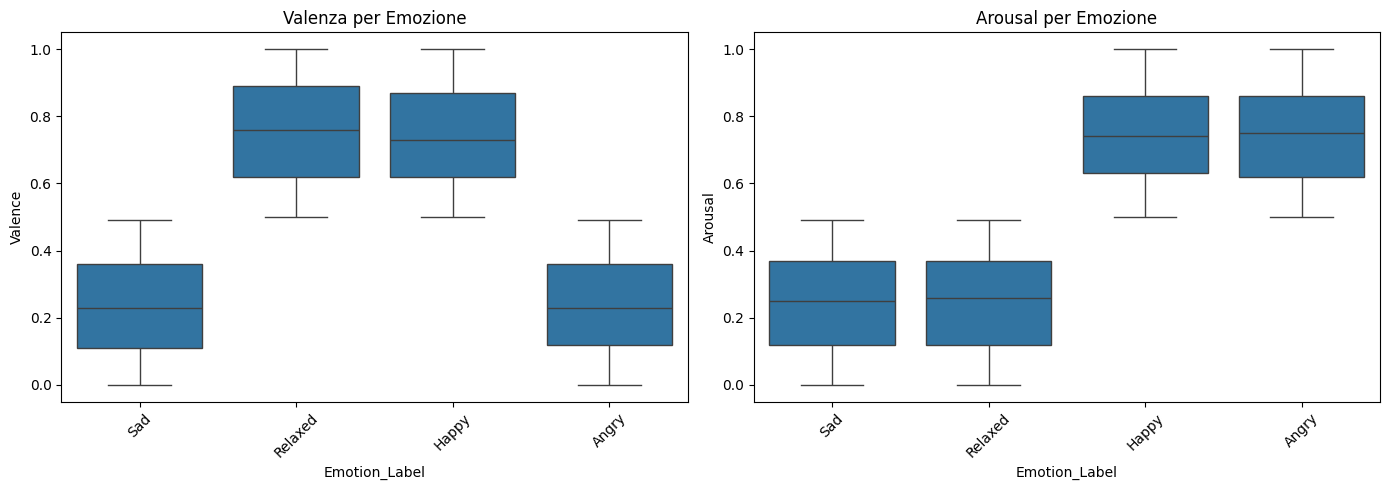

In [9]:
# Boxplot per vedere come Valenza e Arousal variano per ogni emozione
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(data=df, x='Emotion_Label', y='Valence', ax=ax[0])
ax[0].set_title('Valenza per Emozione')
ax[0].tick_params(axis='x', rotation=45)
sns.boxplot(data=df, x='Emotion_Label', y='Arousal', ax=ax[1])
ax[1].set_title('Arousal per Emozione')
ax[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

### Analisi dei Boxplot: Conferma delle Tendenze

I boxplot ci permettono di vedere come i valori di Valenza e Arousal si distribuiscono per ogni singola emozione.

*   **Valenza (grafico a sinistra):**
    *   Come ci aspettavamo, le emozioni **Happy** e **Relaxed** hanno una Valenza mediamente **alta** (la linea mediana del box è alta).
    *   Le emozioni **Sad** e **Angry** hanno una Valenza mediamente **bassa**.
    *   I "baffi" (whiskers) del boxplot mostrano che c'è una certa variabilità, ma le mediane sono ben separate.

*   **Arousal (grafico a destra):**
    *   Le emozioni **Happy** e **Angry** hanno un Arousal mediamente **alto**.
    *   Le emozioni **Sad** e **Relaxed** hanno un Arousal mediamente **basso**.
    *   Anche in questo caso, le mediane dei gruppi "eccitati" e "calmi" sono chiaramente distinte.

**Conclusione:** I boxplot confermano in modo statisticamente solido quanto osservato nello scatter plot. Le emozioni sono ben caratterizzate dalle dimensioni di Valenza e Arousal. Questa coerenza tra l'etichetta emotiva e le sue dimensioni psicologiche sottostanti ci assicura che i dati sono di alta qualità e etichettati in modo affidabile.